In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset Shape: (89945, 30)

Missing Values:
 0

Basic Statistics:
                            count unique            top   freq       mean  \
Patient_ID               89945.0    NaN            NaN    NaN    44973.0   
Age                      89945.0    NaN            NaN    NaN  54.332892   
Gender                     89945      2           Male  49369        NaN   
Race                       89945      5          White  44887        NaN   
Region                     89945      5  North America  31537        NaN   
Urban_or_Rural             89945      2          Urban  62990        NaN   
Socioeconomic_Status       89945      3         Middle  45088        NaN   
Family_History             89945      2             No  67372        NaN   
Previous_Cancer_History    89945      2             No  80985        NaN   
Stage_at_Diagnosis         89945      4             II  26869        NaN   
Tumor_Aggressiveness       89945      3         Medium  35974        NaN   
Colonoscopy_Access   

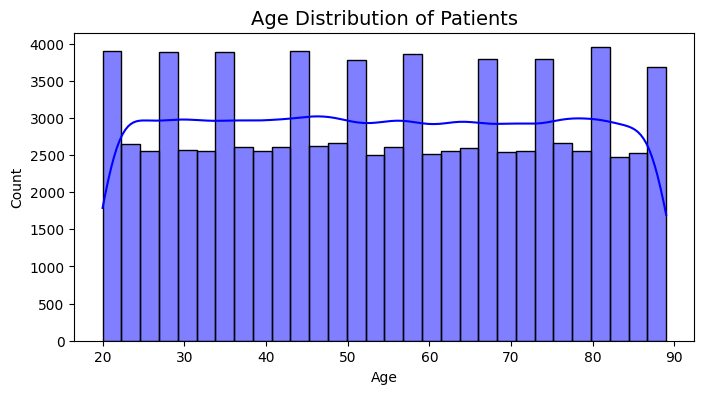

C:\Users\SIAM\AppData\Local\Temp\ipykernel_5892\4047956663.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


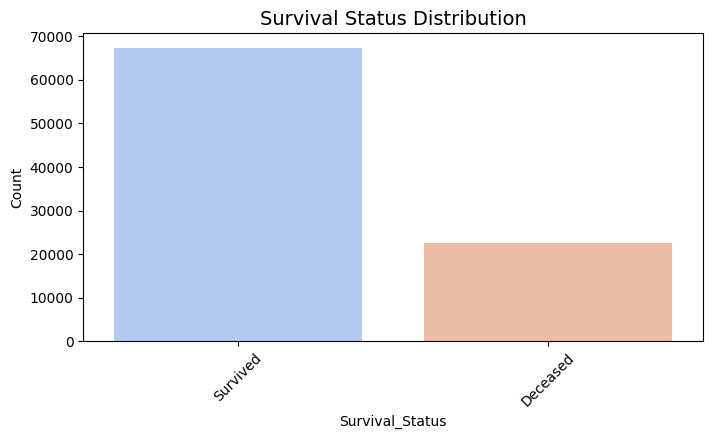

C:\Users\SIAM\AppData\Local\Temp\ipykernel_5892\4047956663.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


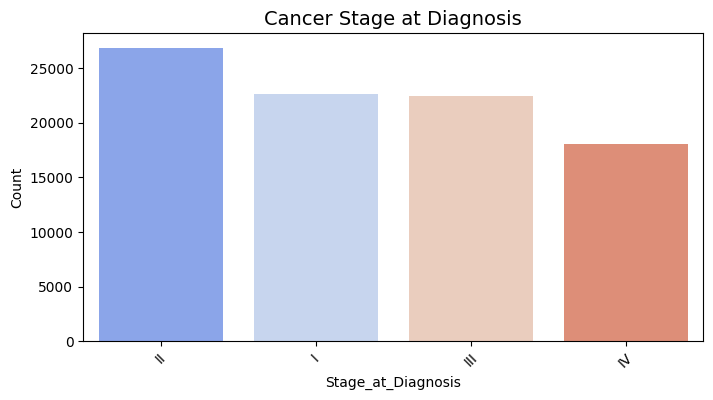

C:\Users\SIAM\AppData\Local\Temp\ipykernel_5892\4047956663.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


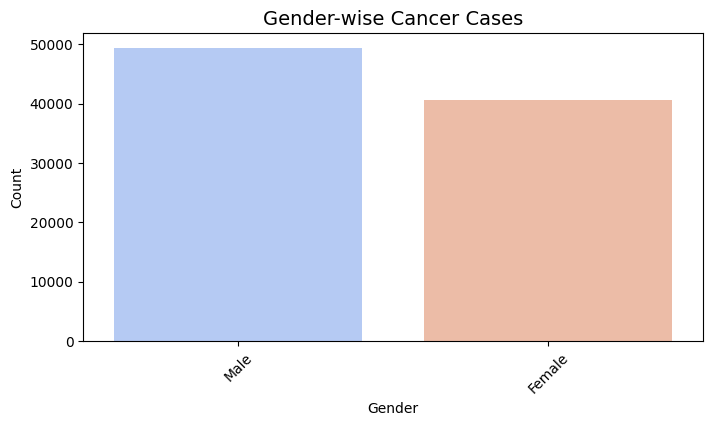

C:\Users\SIAM\AppData\Local\Temp\ipykernel_5892\4047956663.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


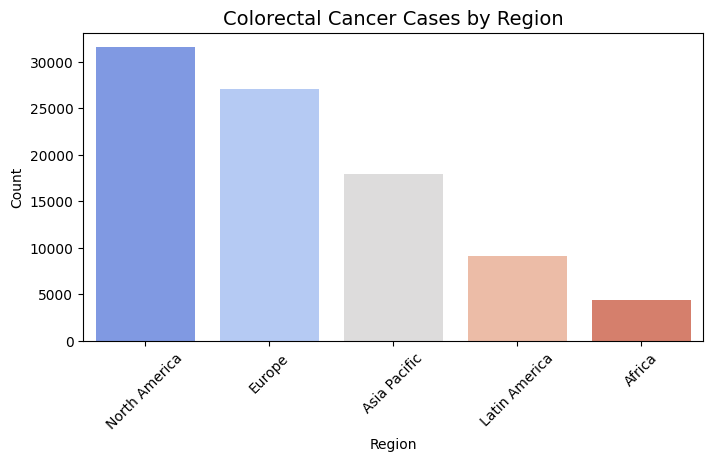

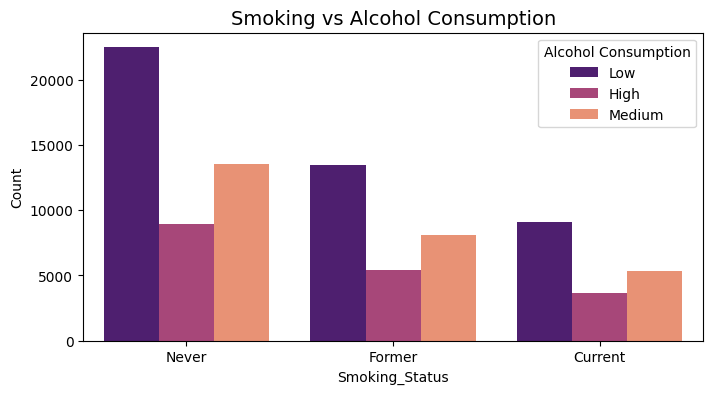

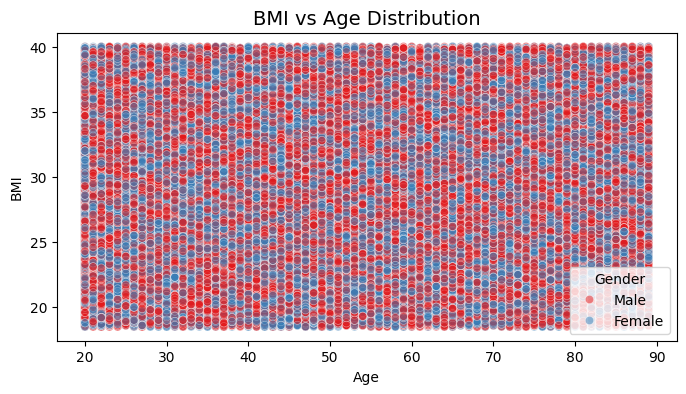

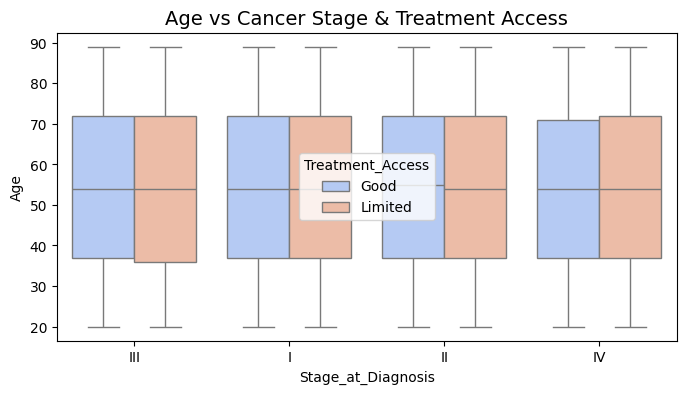

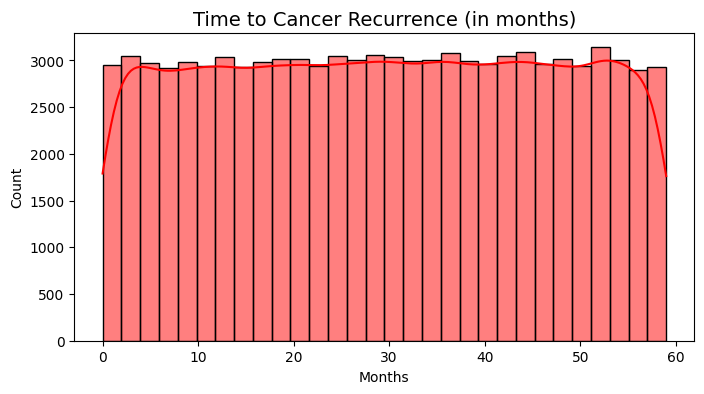

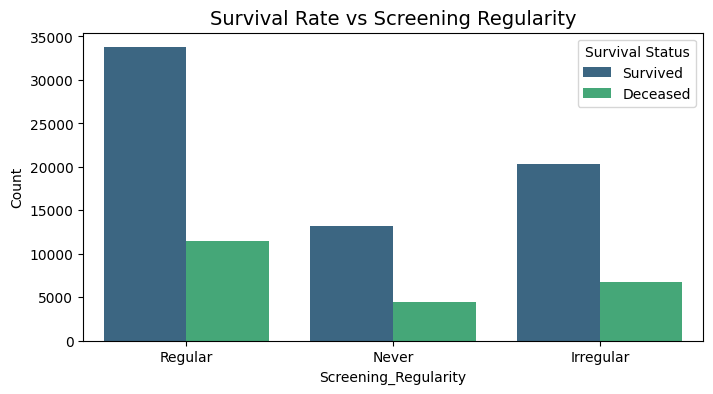

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("./dataset/colorectal_cancer_prediction.csv")

# Display basic info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum().sum())  # Count total missing values
print("\nBasic Statistics:\n", df.describe(include="all").T)

# Function for quick bar plots
def plot_bar(feature, title, top_n=None):
    plt.figure(figsize=(8, 4))
    data = df[feature].value_counts()
    if top_n:
        data = data[:top_n]
    sns.barplot(x=data.index, y=data.values, palette="coolwarm")
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Patients", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Survival Status
plot_bar("Survival_Status", "Survival Status Distribution")

# Cancer Stage at Diagnosis
plot_bar("Stage_at_Diagnosis", "Cancer Stage at Diagnosis")

# Gender-wise Incidence
plot_bar("Gender", "Gender-wise Cancer Cases")

# Regional Distribution
plot_bar("Region", "Colorectal Cancer Cases by Region")

# Lifestyle Impact - Smoking vs. Alcohol
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Smoking_Status", hue="Alcohol_Consumption", palette="magma")
plt.title("Smoking vs Alcohol Consumption", fontsize=14)
plt.ylabel("Count")
plt.legend(title="Alcohol Consumption")
plt.show()

# BMI vs Age
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Age", y="BMI", hue="Gender", alpha=0.5, palette="Set1")
plt.title("BMI vs Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

# Cancer Stage vs. Treatment Access
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Stage_at_Diagnosis", y=df["Age"], hue="Treatment_Access", palette="coolwarm")
plt.title("Age vs Cancer Stage & Treatment Access", fontsize=14)
plt.show()

# Time to Recurrence Analysis
plt.figure(figsize=(8, 4))
sns.histplot(df["Time_to_Recurrence"], bins=30, kde=True, color="red")
plt.title("Time to Cancer Recurrence (in months)", fontsize=14)
plt.xlabel("Months")
plt.ylabel("Count")
plt.show()

# Survival Rate based on Screening Regularity
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Screening_Regularity", hue="Survival_Status", palette="viridis")
plt.title("Survival Rate vs Screening Regularity", fontsize=14)
plt.ylabel("Count")
plt.legend(title="Survival Status")
plt.show()
